# 0. Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
from utils import Dataset, plot_image
from capsnet import CapsNet

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

# 1. Dataset

In [4]:
data_name_1 = 'MNIST'
dataset_1 = Dataset(data_name_1)

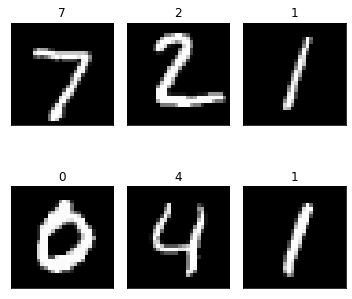

In [5]:
n_img = 6
plot_image(dataset_1.x_test[:n_img], dataset_1.y_test[:n_img], dataset_1.class_names, n_img)

In [6]:
data_name_2 = 'SMALLNORB'
dataset_2 = Dataset(data_name_2)

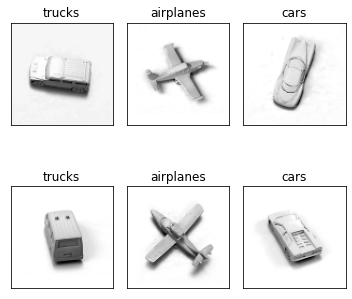

In [7]:
n_img = 6
plot_image(dataset_2.x_test[:n_img], dataset_2.y_test[:n_img], dataset_2.class_names, n_img)

# 2. Load Model

In [8]:
model_train = CapsNet(data_name_2, mode='train', r=3)

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 48, 48, 2)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 40, 40, 256)       41728     
_________________________________________________________________
primary_caps (PrimaryCaps)   (None, 16, 16, 32, 8)     5308672   
_________________________________________________________________
digit_caps (DigitCaps)       (None, 5, 16)             5242960   
_________________________________________________________________
length (Length)              (None, 5)                 0         
Total params: 10,593,360
Trainable params: 10,593,360
Non-trainable params: 0
_________________________________________________________________
Model: "Decoder"
_________________________________________________________________
Layer (type)                 O

# 3. Train Model

In [9]:
data_train, data_test = dataset_2.get_tf_data()
history = model_train.train(dataset_1, initial_epoch=0)

Epoch 1/150


ValueError: in user code:

    D:\Education\BMSTU\Diploma\miniconda3\envs\py38_tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    D:\Education\BMSTU\Diploma\miniconda3\envs\py38_tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    D:\Education\BMSTU\Diploma\miniconda3\envs\py38_tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    D:\Education\BMSTU\Diploma\miniconda3\envs\py38_tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    D:\Education\BMSTU\Diploma\miniconda3\envs\py38_tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    D:\Education\BMSTU\Diploma\miniconda3\envs\py38_tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    D:\Education\BMSTU\Diploma\miniconda3\envs\py38_tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    D:\Education\BMSTU\Diploma\miniconda3\envs\py38_tensorflow\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    D:\Education\BMSTU\Diploma\miniconda3\envs\py38_tensorflow\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:271 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer CapsNet: expected shape=(None, 48, 48, 2), found shape=(100, 28, 28, 1)
